In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import sncosmo
#import jp as sncosmo
import astropy.units as u
import glob
import numpy as np

csp = sncosmo.get_magsystem('csp')

salt2 = sncosmo.SALT2Source(modeldir=None, m0file='salt2_template_0.dat', m1file='salt2_template_1.dat', clfile='salt2_color_correction.dat', cdfile='salt2_color_dispersion.dat', errscalefile='salt2_lc_dispersion_scaling.dat', lcrv00file='salt2_lc_relative_variance_0.dat', lcrv11file='salt2_lc_relative_variance_1.dat', lcrv01file='salt2_lc_relative_covariance_01.dat', name=None, version=None)
#ab = sncosmo.get_magsystem('ab')
chi_quad_ndof = []
names = glob.glob("*.txt")

#print(names)
for j in range(0, len(names)):
    #j = 4
    print(names[j])

    data = sncosmo.read_lc(names[j])
    
    #for i in range(0, len(data['flux'])):
        
    #data['fluxerr'][i] = 2*np.log(10)*(10**((data['zp'][i] - data['flux'][i])/2.5))*data['fluxerr'][i]/2.5 #flux error conversion
    #data['fluxerr'][i] = (2*np.log(10)/5)*10**(2*(data['zp'][i] - data['flux'][i])/5)*data['fluxerr'][i]
        
    #data['flux'][i] = csp.band_mag_to_flux(data['flux'][i], 'cspr')
    
    #print(data['flux'])
    model = sncosmo.Model(source=salt2)
    
    #model.bandmag('cspb', 'csp')
    model.set(z=data['redshift'][0])  # set the model's redshift
    
    result, fitted_model = sncosmo.fit_lc( data, model, ['t0', 'x0', 'x1', 'c'])
               
    index = []
    
    for i in range(0,len(data['time'])):
        
        if data['time'][i] - result.parameters[1] > 50:
            
            index.append(i)
                
        if data['time'][i] - result.parameters[1] < -20:
            
            index.append(i)
        
        
    teste = np.delete(data, index , axis=0)           
    print(data['redshift'][0])
    model2 = sncosmo.Model(source=salt2)
    model.set(z=data['redshift'][0])  # set the model's redshift
    
    result2, fitted_model2 = sncosmo.fit_lc(teste, model2, ['t0', 'x0', 'x1', 'c'])
    
    
    chi_quad_ndof.append(result2.chisq/result2.ndof)
                
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()
print(chi_quad_ndof)
print(np.mean(chi_quad_ndof), np.std(chi_quad_ndof))
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()

SN2004eo.txt
0.0157
[6604.109944860909]
6604.109944860909 0.0


In [68]:
from sncosmo import photdata as pd

In [74]:
pd.PhotometricData(data).normalized(zp=25, zpsys='vega').flux

array([ 865.01544939, 1270.05718566, 1767.75946275, 3456.39192955,
       3964.81370251, 4428.15267008, 4788.75709158, 5117.0869822 ,
       5595.29399209, 5457.86976484, 3899.62640282, 3599.34271692,
       3261.54079544, 2966.35576014, 2673.15071291, 2406.70814186,
       1945.46520562, 1754.78437606, 1310.45474455, 1103.12170759,
       1011.63610476,  918.38084226,  872.21013133,  810.25753744,
        741.00872375,  664.69577679,  616.34345262,  589.14581424,
        563.14849829,  541.28087176,  511.70869822,  398.67893943,
        362.5960139 ,  295.81674578, 1402.0536411 , 1982.2773905 ,
       2625.22072652, 4870.41035086, 5535.59992588, 6142.78240335,
       6661.39123937, 7046.3698675 , 7398.8664013 , 7935.33803883,
       7906.14646057, 6373.30655761, 6014.02921034, 5643.7168824 ,
       5374.83471226, 5170.8932271 , 4974.68445469, 4672.67383885,
       4545.33086702, 4156.86194149, 3872.26755713, 3691.18340679,
       3554.3919531 , 3341.68359298, 3176.6172048 , 2975.53141

In [76]:
pd.PhotometricData(data).flux

array([0.119268 , 0.175115 , 0.243738 , 0.476566 , 0.546667 , 0.610552 ,
       0.660272 , 0.705542 , 0.771477 , 0.752529 , 0.537679 , 0.496276 ,
       0.4497   , 0.409    , 0.368573 , 0.331836 , 0.26824  , 0.241949 ,
       0.180685 , 0.152098 , 0.139484 , 0.126626 , 0.12026  , 0.111718 ,
       0.10217  , 0.091648 , 0.0849812, 0.0812312, 0.0776467, 0.0746316,
       0.0705542, 0.0549697, 0.0499946, 0.0407871, 0.119305 , 0.168678 ,
       0.223388 , 0.414438 , 0.471041 , 0.522708 , 0.566838 , 0.599597 ,
       0.629592 , 0.675242 , 0.672758 , 0.542324 , 0.511752 , 0.480241 ,
       0.457361 , 0.440007 , 0.423311 , 0.397612 , 0.386776 , 0.35372  ,
       0.329503 , 0.314094 , 0.302454 , 0.284354 , 0.270308 , 0.253197 ,
       0.22012  , 0.20392  , 0.19066  , 0.178591 , 0.168058 , 0.159023 ,
       0.11083  , 0.0877928, 0.0616395, 0.0721657, 0.103832 , 0.139936 ,
       0.251612 , 0.281016 , 0.306712 , 0.320576 , 0.329254 , 0.329254 ,
       0.319397 , 0.308696 , 0.30056  , 0.295346 , 

<IPython.core.display.Javascript object>


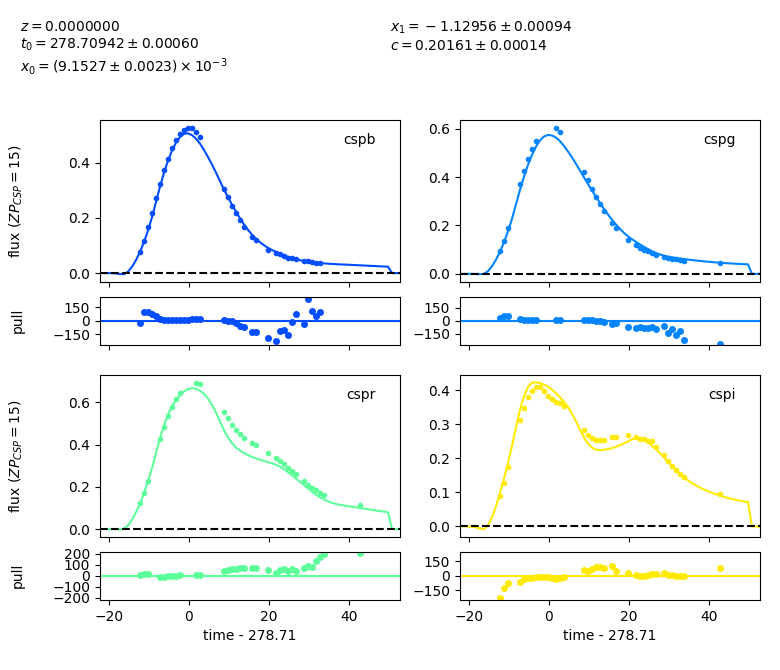

In [77]:
%matplotlib notebook
sncosmo.plot_lc(teste, model=fitted_model2, errors=result2.errors, zp = 15, zpsys = 'csp')
plt.show()

In [ ]:
import os.path

In [2]:
name_of_file = "salt2rband"

completeName = os.path.join("/home/joao/Documentos/comparacao", name_of_file+".dat")      

f = open(completeName, 'w')
for i in range(0,len(chi_quad_ndof)):
    
    f.write(str(chi_quad_ndof[i])+"\n")
    
f.close()

NameError: name 'os' is not defined

In [ ]:
print(np.mean(chi_quad_ndof))
print(len(chi_quad_ndof))

In [ ]:
histograma = plt.hist(chi_quad_ndof, bins=20)
plt.title("Histograma chi_quadrado por grau de liberdade")
plt.show()

In [ ]:
from __future__ import print_function
import matplotlib.pyplot as plt
#import sncosmo
import jp as sncosmo
import astropy.units as u
import glob
import numpy as np

par= sncosmo.SALT2Source(modeldir=None, m0file='M0.dat', m1file='M1.dat', m2file='M2.dat', cdfile='salt2_color_dispersion.dat', errscalefile='salt2_lc_dispersion_scaling.dat', lcrv00file='salt2_lc_relative_variance_0.dat', lcrv11file='salt2_lc_relative_variance_1.dat', lcrv01file='salt2_lc_relative_covariance_01.dat', name=None, version=None)
#ab = sncosmo.get_magsystem('ab')
chi_quad_ndof = []
names = glob.glob("*.txt")

for j in range(0, len(names)):
    #j = 4
    print(names[j])

    data = sncosmo.read_lc(names[j])
    data['zp'] = 14.328
    #print(data['flux'])
    
    for i in range(0, len(data['flux'])):
        
        data['fluxerr'][i] = 2*np.log(10)*(10**((data['zp'][i] - data['flux'][i])/2.5))*data['fluxerr'][i]/2.5 #flux error conversion
        #data['fluxerr'][i] = (2*np.log(10)/5)*10**(2*(data['zp'][i] - data['flux'][i])/5)*data['fluxerr'][i]
        
        data['flux'][i] = csp.band_mag_to_flux(data['flux'][i], 'cspb')
    
    #print(data['flux'])
    model = sncosmo.Model(source=par)
    #model.bandmag('cspb', 'csp')
    #model.set(z=0.0151)  # set the model's redshift
    
    result, fitted_model = sncosmo.fit_lc( data, model, ['z', 't0', 'x0', 'x1', 'x2'], bounds={'z':(0, data['redshift'][0]+0.1)})
               
    index = []
    
    for i in range(0,len(data['time'])):
        
        if data['time'][i] - result.parameters[1] > 50:
            
            index.append(i)
                
        if data['time'][i] - result.parameters[1] < -20:
            
            index.append(i)
        
        
    teste = np.delete(data, index , axis=0)           
    
    model2 = sncosmo.Model(source=par)
    
    result2, fitted_model2 = sncosmo.fit_lc(teste, model2, ['z', 't0', 'x0', 'x1', 'x2'], bounds={'z':(teste['redshift'][0]-0.01, teste['redshift'][0]+0.01)})
    
    
    chi_quad_ndof.append(result2.chisq/result2.ndof)
                
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()
print(chi_quad_ndof)
print(np.mean(chi_quad_ndof), np.std(chi_quad_ndof))
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()

In [ ]:
sncosmo.plot_lc(teste, model=fitted_model2, errors=result2.errors, zp=14.328, zpsys='csp')
plt.show()

In [ ]:
np.mean(chi_quad_ndof)
len(chi_quad_ndof)

In [ ]:
histograma = plt.hist(chi_quad_ndof, bins=20)
plt.title("Histograma chi_quadrado por grauf de liberdade")
plt.show()